In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

##  Load and split data into train and test part

In [2]:
(train_feature,train_labels),(test_feature,test_labels)=keras.datasets.mnist.load_data()

In [3]:
len(train_feature)

60000

In [4]:
len(train_labels)

60000

In [5]:
len(test_feature)

10000

In [6]:
len(test_labels)

10000

In [7]:
train_feature[0].shape

(28, 28)

In [8]:
#train_feature[0]

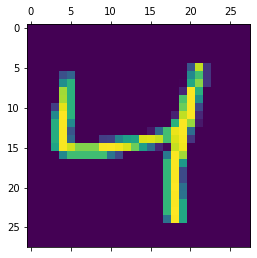

In [9]:
plt.matshow(train_feature[2])

In [10]:
train_labels[2]

4

In [11]:
train_labels[:8]

array([5, 0, 4, 1, 9, 2, 1, 3], dtype=uint8)

## Feature scalling

In [12]:
train_feature=train_feature/255
test_feature=test_feature/255

In [13]:
train_feature.shape

(60000, 28, 28)

In [14]:
#After feature scalling
#train_feature[0]

In [15]:
train_feature_flattened=train_feature.reshape(len(train_feature),28*28)
test_feature_flattened=test_feature.reshape(len(test_feature),28*28)

In [16]:
train_feature_flattened.shape

(60000, 784)

In [17]:
test_feature_flattened.shape

(10000, 784)

In [18]:
#train_feature_flattened[0]
# One-D array

## Building model 

In [19]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(train_feature_flattened,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 854us/step - loss: 0.7265 - accuracy: 0.8095
Epoch 2/5
1875/1875 [==============================] - 2s 840us/step - loss: 0.3126 - accuracy: 0.9138
Epoch 3/5
1875/1875 [==============================] - 2s 871us/step - loss: 0.2812 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 880us/step - loss: 0.2690 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 2s 931us/step - loss: 0.2681 - accuracy: 0.9255


In [20]:
model.evaluate(test_feature_flattened,test_labels)

313/313 [==============================] - 0s 586us/step - loss: 0.2696 - accuracy: 0.9258


[0.26958706974983215, 0.9258000254631042]

In [21]:
predicted_labels=model.predict(test_feature_flattened)

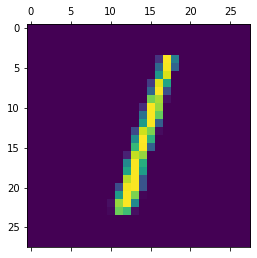

In [22]:
plt.matshow(test_feature[2])

In [23]:
predicted_labels[2]

array([5.3369999e-04, 9.9270892e-01, 6.6353142e-01, 3.0371594e-01,
       2.9194146e-02, 1.1887285e-01, 1.5486664e-01, 1.2212506e-01,
       3.5958588e-01, 4.5789599e-02], dtype=float32)

In [24]:
np.argmax(predicted_labels[2])

1

In [25]:
predicted_labels=[np.argmax(i) for i in predicted_labels]

In [26]:
predicted_labels[:5]

[7, 2, 1, 0, 4]

In [27]:
test_labels[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

## Confusion Matrix for analizing acuracy

In [28]:
cm=tf.math.confusion_matrix(labels=test_labels, predictions=predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [  10,    9,  921,   15,   10,    2,   13,   10,   38,    4],
       [   4,    0,   20,  918,    1,   25,    2,    9,   22,    9],
       [   2,    1,    2,    1,  926,    0,   11,    3,    9,   27],
       [  12,    2,    2,   28,   12,  783,   18,    4,   27,    4],
       [  14,    3,    4,    1,    7,   11,  914,    2,    2,    0],
       [   1,    6,   24,    6,   10,    1,    0,  948,    2,   30],
       [  12,    6,    6,   18,    9,   34,   10,   11,  861,    7],
       [  13,    7,    1,    9,   32,    7,    0,   21,    7,  912]])>

Text(69.0, 0.5, 'Truth')

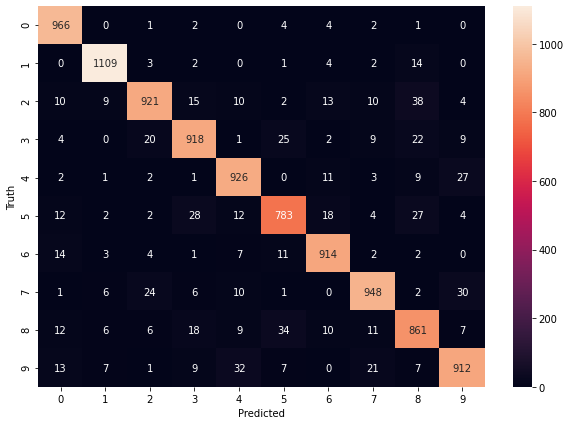

In [29]:
import seaborn as sb
plt.figure(figsize = (10,7))
sb.heatmap(cm,  annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Add Hidden Layer

In [30]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(train_feature_flattened,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4459 - accuracy: 0.8732
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1323 - accuracy: 0.9607
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0828 - accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0649 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0494 - accuracy: 0.9857


In [31]:
model.evaluate(test_feature_flattened,test_labels)

313/313 [==============================] - 0s 819us/step - loss: 0.0752 - accuracy: 0.9769


[0.0752069279551506, 0.9768999814987183]

In [32]:
predicted_labels=model.predict(test_feature_flattened)
predicted_labels=[np.argmax(i) for i in predicted_labels]
cm=tf.math.confusion_matrix(labels=test_labels, predictions=predicted_labels)

Text(69.0, 0.5, 'Truth')

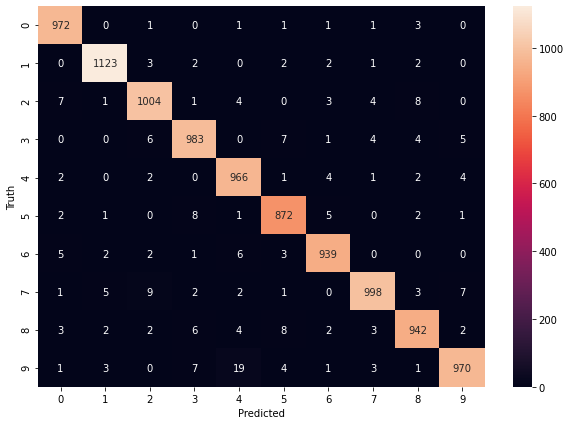

In [33]:
import seaborn as sb
plt.figure(figsize = (10,7))
sb.heatmap(cm,  annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## If you dont want flattened seprately so you can flattened feature inside the building model 

In [34]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(train_feature,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4531 - accuracy: 0.8732
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1372 - accuracy: 0.9608
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0909 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0636 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0495 - accuracy: 0.9855
